**<center><font size=5>Predict of ERP in EEG data</font></center>**
**<center>Gifted Group <i>vs</i> Control Group</center>**
***
**author**: Ábner Lucas
**date**: Junho, 2022
**[GitHub Repository](https://github.com/abner-lucas/time_series_prediction_on_EEG_data.git)**

### Table of Contents
- <a href='#env'>1. Configurando o Ambiente</a>
  - <a href='#import_lib'>1.1. Bibliotecas</a>
  - <a href='#load_evoked'>1.2. Carregar dados evocados</a>
  - <a href='#load_trials'>1.3. Carregar trials</a>
  - <a href='#load_ip'>1.4. Carregar perfomances individuais</a>
- <a href='#predict'>2. Predizendo séries de ERPs</a>
  - <a href='#p_vis'>2.1. Visualiação dos ERPs</a>
  - <a href='#p_mlp'>2.2. Predição com MLP (DFF) Frontal e Parietal com Keras tunner</a>
    - <a href='#p_mlp_c'>2.2.1. Treinamento na base Controle</a>
      - <a href='#p_mlp_c_train'>2.2.1.1 Treinamento</a>
      - <a href='#p_mlp_c_plottrain'>2.2.1.2 Convergência do erro</a>
      - <a href='#p_mlp_c_pred'>2.2.1.3 Predizendo dados de teste</a>
    - <a href='#p_mlp_g'>2.2.2. Treinamento na base Superdotado</a>
      - <a href='#p_mlp_g_train'>2.2.2.1 Treinamento</a>
      - <a href='#p_mlp_g_plottrain'>2.2.2.2 Convergência do erro</a>
      - <a href='#p_mlp_g_pred'>2.2.2.3 Predizendo dados de teste</a>
    - <a href='#p_mlp_class'>2.2.3. Classificação a partir das predições anteriores (MLP - DFF)</a>
  - <a href='#ensemble'>2.3. Ensemble Learning Methods</a>

## <a id='env'>1. Configurando o Ambiente</a>

### <a id='import_lib'>1.1. Importando bibliotecas</a>

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

# !git clone https://github.com/abner-lucas/time_series_prediction_on_EEG_data.git

In [2]:
import os
import sys
sys.path.append(os.path.abspath('..'))
# sys.path.append(os.path.abspath('/content/time_series_prediction_on_EEG_data/'))

import shutil
# removing local directory
dir_hyperband_tuner = "D:/Documentos/Mestrado/2021/UFPA Ciência Computação/EEG/time_series_prediction_on_EEG_data/notebooks/hyperband_tuner"
dir__pycache__ = "D:/Documentos/Mestrado/2021/UFPA Ciência Computação/EEG/time_series_prediction_on_EEG_data/src/__pycache__"

if os.path.exists(dir_hyperband_tuner):
    shutil.rmtree(dir_hyperband_tuner)
if os.path.exists(dir__pycache__):
    shutil.rmtree(dir__pycache__)

In [3]:
from src.plot_series import *
from src.load_dataset import *
from src.compile_data import *
# DFF
from src.functions_dff import *
from src.metrics import *

import matplotlib.pyplot as plt
import numpy as np

# !pip install scikeras
# !pip install keras-tuner --upgrade
import keras_tuner as kt
import warnings
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

In [4]:
filenames_list = os.listdir('D:/Documentos/Mestrado/2021/UFPA Ciência Computação/EEG/outputs_eeg/') # lista de nomes de arquivos no diretório
# filenames_list = os.listdir('/content/drive/MyDrive/Colab Notebooks/PPGCC/EEG/outputs_eeg/')

xs = [f'{x[:7]} {x[7:11]}' for x in filenames_list if x.endswith('trials.csv')]

print('Quantidade total de coletas: ' + str(len(xs)) + ' sujeitos')

Quantidade total de coletas: 19 sujeitos


### <a id='load_evoked'>1.2. Carregar dados evocados</a>

In [5]:
EEG_evoked = load_evoked(filenames_list)

100%|██████████| 76/76 [00:00<00:00, 102.67it/s]


In [6]:
# EEG_evoked.info()
# EEG_evoked.head()

### <a id='load_trials'>1.3. Carregar trials</a>

In [7]:
# EEG_trials = load_trials(filenames_list)

In [8]:
# EEG_trials.info()
# EEG_trials.head()

### <a id='load_ip'>1.4. Carregar perfomances individuais</a>

In [9]:
# EEG_ip = load_ip(filenames_list)
# EEG_ip.head()

In [10]:
#EEG_diferentes = EEG_data.loc[EEG_data['condition'].str.endswith('R')]

## <a id='predict'>2. Predizendo séries de ERPs</a>

In [11]:
sensor_frontal = ['F7', 'F5', 'F3', 'F1', 'Fz','F8', 'F6', 'F4', 'F2']
sensor_parietal = ['P7', 'P5', 'P3', 'P1', 'Pz', 'P8', 'P6', 'P4', 'P2']

### <a id='p_vis'>2.1. Visualiação dos ERPs</a>

In [ ]:
# controls = EEG_evoked[EEG_evoked['group'] == 'control'].copy()
# gifteds = EEG_evoked[EEG_evoked['group'] == 'gifted'].copy()
# n_c = str(len(controls['subject_id'].unique()))
# n_g = str(len(gifteds['subject_id'].unique()))

# print('Sujeitos no grupo controle: ' + n_c)
# print('Sujeitos no grupo superdotado: ' + n_g)

In [ ]:
# C_sample_df, C_data = mean_evokeds(controls)

# C_data_frontal = C_data[sensor_frontal]
# C_data_parietal = C_data[sensor_parietal]

In [ ]:
# sp = Subplot2D(nrows=2, ncols=1, figsize=(19,9))
# sp.add_subplot(C_data_frontal, 1, 'Plot multiple frontal lobe channels - Control subjects')
# sp.add_subplot(C_data_parietal, 2, 'Plot multiple parietal lobe channels - Control subjects', sharex=1)
# fig1 = sp.show();
# # fig1.savefig('outputs_fig/fig1_control_evoked_frontal_parietal.png')
# fig1.savefig('/content/drive/MyDrive/Colab Notebooks/PPGCC/EEG/outputs_fig_visual/fig1_control_evoked_frontal_parietal.png')

In [ ]:
# G_sample_df, G_data = mean_evokeds(controls)

# G_data_frontal = G_data[sensor_frontal]
# G_data_parietal = G_data[sensor_parietal]

In [ ]:
# sp = Subplot2D(nrows=2, ncols=1, figsize=(19,9))
# sp.add_subplot(G_data_frontal, 1, 'Plot multiple frontal lobe channels - Gifted subjects')
# sp.add_subplot(G_data_parietal, 2, 'Plot multiple parietal lobe channels - Gifted subjects', sharex=1)
# fig2 = sp.show();
# # fig2.savefig('outputs_fig/fig2_gifted_evoked_frontal_parietal.png')
# fig2.savefig('/content/drive/MyDrive/Colab Notebooks/PPGCC/EEG/outputs_fig_visual/fig2_gifted_evoked_frontal_parietal.png')

### <a id='p_mlp'>2.2. Predição com MLP (DFF) Frontal e Parietal com Keras tunner</a>

In [ ]:
step = 9
max_epochs = 100
epochs = 100
batch_size = 64

#### <a id='p_mlp_c'>2.2.1. Treinamento na base Controle</a>

##### <a id='p_mlp_c_train'>2.2.1.1 Treinamento</a>

In [17]:
controls = EEG_evoked[EEG_evoked['group'] == 'control'].copy()

#Pegando somente as amostras do início do estímulo até 1,5 segundos
control_subjects = controls[(controls['time'] >= 0) & (controls['time'] <= 1500)]

#separar em df com os canais frontal e parietal
s_control_frontal = control_subjects[['subject_id', 'group', 'time'] + sensor_frontal].copy()
s_control_parietal = control_subjects[['subject_id', 'group', 'time'] + sensor_parietal].copy()

print('Quantidade total de sujeitos para treino e teste: ' + str(len(control_subjects['subject_id'].unique())))

Quantidade total de sujeitos para treino e teste: 9


In [18]:
#FRONTAL
C_train_f, C_validation_f, C_test_f, C_mean_sensors_f = train_test_split(s_control_frontal,
                                                                         val_size=0.2,
                                                                         test_size=0.2)
C_x_train_f, C_y_train_f = split_sequence(data=C_train_f.values, n_steps=steps)
C_x_validation_f, C_y_validation_f = split_sequence(data=C_validation_f.values, n_steps=steps)
C_x_test_f, C_y_test_f = split_sequence(data=C_test_f.values, n_steps=steps)

#PARIETAL
C_train_p, C_validation_p, C_test_p, C_mean_sensors_p = train_test_split(s_control_parietal,
                                                                         val_size=0.2,
                                                                         test_size=0.2)
C_x_train_p, C_y_train_p = split_sequence(data=C_train_p.values, n_steps=steps)
C_x_validation_p, C_y_validation_p = split_sequence(data=C_validation_p.values, n_steps=steps)
C_x_test_p, C_y_test_p = split_sequence(data=C_test_p.values, n_steps=steps)

In [20]:
# HyperBand para a região frontal
tuner_cf = kt.Hyperband(build_model, kt.Objective("mse", direction="min"), 
                        max_epochs=max_epochs, directory='hyperband_tuner/tuner_c_f')

#tuner_cf.search_space_generator.verbose = 0
tuner_cf.search(C_x_train_f, C_y_train_f, epochs=epochs, batch_size=batch_size,
                validation_data=(C_x_validation_f, C_y_validation_f), shuffle=False, verbose=1)

# HyperBand para a região parietal
tuner_cp = kt.Hyperband(build_model, kt.Objective("mse", direction="min"),
                        max_epochs=max_epochs, directory='hyperband_tuner/tuner_c_p')

tuner_cp.search(C_x_train_p, C_y_train_p, epochs=epochs, batch_size=batch_size,
                validation_data=(C_x_validation_p, C_y_validation_p), shuffle=False, verbose=1)

INFO:tensorflow:Oracle triggered exit
INFO:tensorflow:Oracle triggered exit


In [21]:
best_model_cf = tuner_cf.get_best_models()[0]
best_model_cf.build(C_x_train_f.shape)
# best_model_cf.summary()
print('Melhores parâmetros para a região frontal:\n')
print(tuner_cf.get_best_hyperparameters()[0].values)

best_model_cp = tuner_cp.get_best_models()[0]
best_model_cp.build(C_x_train_p.shape)
# best_model_cp.summary()
print('\nMelhores parâmetros para a região parietal:\n')
print(tuner_cp.get_best_hyperparameters()[0].values)

Melhores parâmetros para a região frontal:

{'learning_rate': 0.0001, 'optimizer': 'adam', 'net_depth': 5, 'units0': 36, 'units1': 54, 'kernel_init': 'random_uniform', 'activation': 'linear', 'activation_out': 'linear', 'units2': 18, 'units3': 36, 'units4': 36, 'units5': 54, 'tuner/epochs': 10, 'tuner/initial_epoch': 4, 'tuner/bracket': 2, 'tuner/round': 2, 'tuner/trial_id': '0013'}

Melhores parâmetros para a região parietal:

{'learning_rate': 0.0001, 'optimizer': 'rmsprop', 'net_depth': 5, 'units0': 36, 'units1': 36, 'kernel_init': 'random_uniform', 'activation': 'relu', 'activation_out': 'linear', 'units2': 54, 'units3': 18, 'units4': 36, 'units5': 36, 'tuner/epochs': 4, 'tuner/initial_epoch': 0, 'tuner/bracket': 1, 'tuner/round': 0}


In [22]:
# Treinando melhor modelo para a região frontal
fit_cf = best_model_cf.fit(C_x_train_f, C_y_train_f, epochs=epochs, batch_size=batch_size,
                           validation_data=(C_x_validation_f, C_y_validation_f), shuffle=False,
                           verbose=1)

# Treinando melhor modelo para a região parietal
fit_cp = best_model_cp.fit(C_x_train_p, C_y_train_p, epochs=epochs, batch_size=batch_size,
                           validation_data=(C_x_validation_p, C_y_validation_p), shuffle=False,
                           verbose=1)

##### <a id='p_mlp_c_plottrain'>2.2.1.2 Convergência do erro</a>

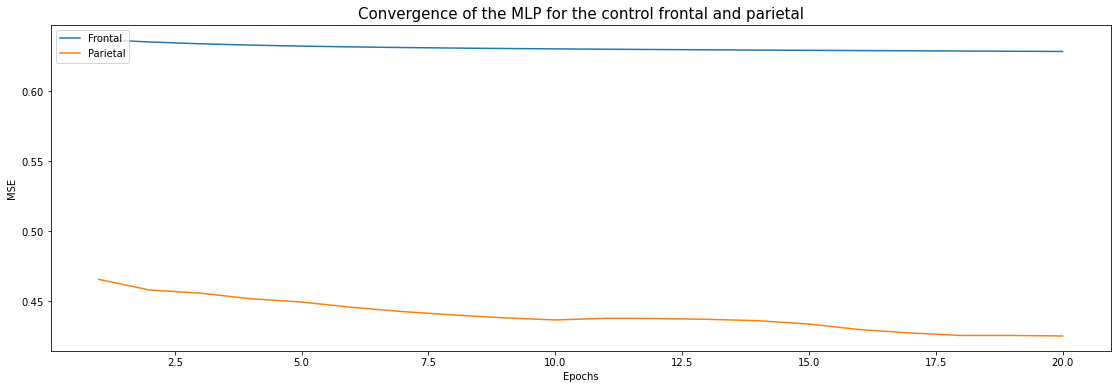

In [23]:
#subplots MSE frontal e parietal
# fig3 = plt.figure(figsize=(19,12))
# x1 = np.arange(1, len(fit_cf.history['loss']) + 1)
# plt.subplot(2,1,1)
# plt.plot(x1, fit_cf.history['loss'])
# plt.plot(fit_cf.history['val_loss'])
# plt.title('Convergence of the MLP for the control frontal',fontsize=15)
# plt.xlabel('Epochs')
# plt.ylabel('MSE')
# plt.legend(['Train', 'Validation'], loc='upper left')
# plt.subplot(2,1,2)
# x2 = np.arange(1, len(fit_cp.history['loss']) + 1)
# plt.plot(x2, fit_cp.history['loss'])
# plt.plot(fit_cp.history['val_loss'])
# plt.title('Convergence of the MLP for the control parietal',fontsize=15)
# plt.xlabel('Epochs')
# plt.ylabel('MSE')
# plt.legend(['Train', 'Validation'], loc='upper left')

fig3 = plt.figure(figsize=(19,6))
x1 = np.arange(1, len(fit_cf.history['loss']) + 1)
plt.plot(x1, fit_cf.history['loss'])
plt.plot(x1, fit_cp.history['loss'])
plt.title('Convergence of the MLP for the control frontal and parietal',fontsize=15)
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend(['Frontal', 'Parietal'], loc='upper left')

plt.savefig(f'outputs_fig/fig3_convergence_mlp_regressor_control_frontal_parietal.png')
# plt.savefig('/content/drive/MyDrive/Colab Notebooks/PPGCC/EEG/outputs_fig_visual/fig3_convergence_mlp_regressor_control_frontal_parietal.png')

##### <a id='p_mlp_c_pred'>2.2.1.3 Predizendo dados de teste</a>

In [24]:
pred_control_f = best_model_cf.predict(C_x_test_f)
pred_control_p = best_model_cp.predict(C_x_test_p)

rmse, mae, mape = [], [], []

rmse.append(np.sqrt(mean_squared_error(C_y_test_f, pred_control_f)))
mae.append(mean_absolute_error(C_y_test_f, pred_control_f))
mape.append(mean_absolute_percentage_error(C_y_test_f, pred_control_f))

rmse.append(np.sqrt(mean_squared_error(C_y_test_p, pred_control_p)))
mae.append(mean_absolute_error(C_y_test_p, pred_control_p))
mape.append(mean_absolute_percentage_error(C_y_test_p, pred_control_p))

print(f'\nMédia das métricas de validação no grupo Controle (frontal e parietal)\n')
print(f'RMSE: {np.mean(rmse):.5f}\n')
print(f'MAE:  {np.mean(mae):.5f}\n')
print(f'MAPE: {np.mean(mape):.2f}%')

47/47 [==============================] - 0s 2ms/step

Média das métricas de validação no grupo Controle (frontal e parietal)

RMSE: 1.01317

MAE:  0.75643

MAPE: 2.37%


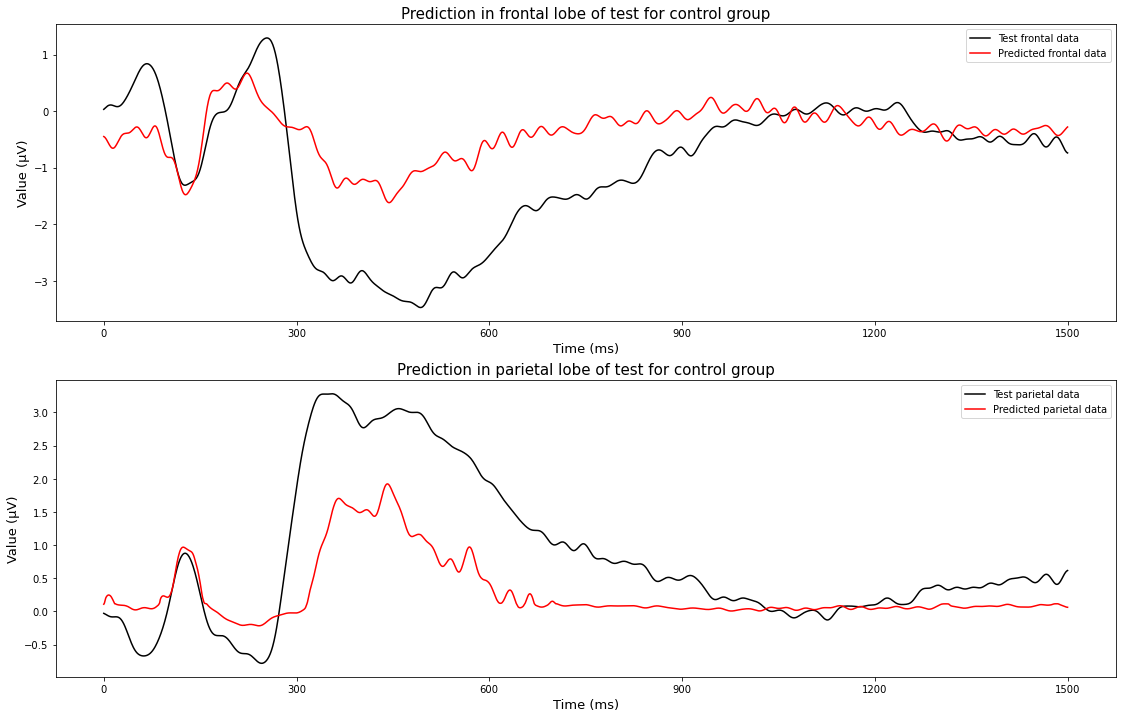

In [25]:
fig4 = plt.figure(figsize=(19,12))
plt.subplot(2,1,1)
plt.plot(C_y_test_f, 'k', label='Test frontal data')
plt.plot(pred_control_f, 'r', label='Predicted frontal data')
plt.xticks(np.arange(0, len(C_y_test_f), step=300))
plt.legend()
plt.title("Prediction in frontal lobe of test for control group",fontsize=15)
plt.xlabel("Time (ms)",fontsize=13)
plt.ylabel("Value (µV)",fontsize=13)
plt.subplot(2,1,2)
plt.plot(C_y_test_p, 'k', label='Test parietal data')
plt.plot(pred_control_p, 'r', label='Predicted parietal data')
plt.xticks(np.arange(0, len(C_y_test_p), step=300))
plt.legend()
plt.title("Prediction in parietal lobe of test for control group",fontsize=15)
plt.xlabel("Time (ms)",fontsize=13)
plt.ylabel("Value (µV)",fontsize=13)

plt.savefig(f'outputs_fig/fig4_prediction_test_control_frontal_parietal.png')
# plt.savefig('/content/drive/MyDrive/Colab Notebooks/PPGCC/EEG/outputs_fig_visual/fig4_prediction_test_control_frontal_parietal.png')

#### <a id='p_mlp_g'>2.2.2. Treinamento na base Superdotado</a>

##### <a id='p_mlp_g_train'>2.2.2.1 Treinamento</a>

In [26]:
#Pegando somente as amostras do início do estímulo até 1,5 segundos
gifteds = EEG_evoked[EEG_evoked['group'] == 'gifted'].copy()
gifted_subjects = gifteds[(gifteds['time'] >= 0) & (gifteds['time'] <= 1500)]

#Separando um sujeito para o teste final com regressão e classificação
s_classify = [gifted_subjects['subject_id'].unique()[-1]]
gifted_subjects = gifted_subjects[~gifted_subjects['subject_id'].isin(s_classify)]

#separar em df com os canais frontal e parietal
s_gifted_frontal = gifted_subjects[['subject_id', 'group', 'time'] + sensor_frontal].copy()
s_gifted_parietal = gifted_subjects[['subject_id', 'group', 'time'] + sensor_parietal].copy()

print('Quantidade total de sujeitos para treino e teste: ' + str(len(gifted_subjects['subject_id'].unique())))

Quantidade total de sujeitos para treino e teste: 9


In [27]:
#FRONTAL
G_train_f, G_validation_f, G_test_f, G_mean_sensors_f = train_test_split(s_gifted_frontal,
                                                                         val_size=0.2,
                                                                         test_size=0.2)
G_x_train_f, G_y_train_f = split_sequence(data=G_train_f.values, n_steps=steps)
G_x_validation_f, G_y_validation_f = split_sequence(data=G_validation_f.values, n_steps=steps)
G_x_test_f, G_y_test_f = split_sequence(data=G_test_f.values, n_steps=steps)

#PARIETAL
G_train_p, G_validation_p, G_test_p, G_mean_sensors_p = train_test_split(s_gifted_parietal,
                                                                         val_size=0.2,
                                                                         test_size=0.2)
G_x_train_p, G_y_train_p = split_sequence(data=G_train_p.values, n_steps=steps)
G_x_validation_p, G_y_validation_p = split_sequence(data=G_validation_p.values, n_steps=steps)
G_x_test_p, G_y_test_p = split_sequence(data=G_test_p.values, n_steps=steps)

In [28]:
# HyperBand para a região frontal
tuner_gf = kt.Hyperband(build_model, kt.Objective("mse", direction="min"),
                        max_epochs=max_epochs, directory='hyperband_tuner/tuner_g_f')

tuner_gf.search(G_x_train_f, G_y_train_f, epochs=epochs, batch_size=batch_size,
                validation_data=(G_x_validation_f, G_y_validation_f), shuffle=False, verbose=1)

# HyperBand para a região parietal
tuner_gp = kt.Hyperband(build_model, kt.Objective("mse", direction="min"),
                        max_epochs=max_epochs, directory='hyperband_tuner/tuner_g_p')

tuner_gp.search(G_x_train_p, G_y_train_p, epochs=epochs, batch_size=batch_size,
                validation_data=(G_x_validation_p, G_y_validation_p), shuffle=False, verbose=1)

Trial 30 Complete [00h 00m 13s]
mse: 0.3813680410385132

Best mse So Far: 0.3689553141593933
Total elapsed time: 00h 03m 50s
INFO:tensorflow:Oracle triggered exit


In [29]:
best_model_gf = tuner_gf.get_best_models()[0]
best_model_gf.build(G_x_train_f.shape)
# best_model_gf.summary()
print('Melhores parâmetros para a região frontal:\n')
print(tuner_gf.get_best_hyperparameters()[0].values)

best_model_gp = tuner_gp.get_best_models()[0]
best_model_gp.build(G_x_train_p.shape)
# best_model_gp.summary()
print('\nMelhores parâmetros para a região parietal:\n')
print(tuner_gp.get_best_hyperparameters()[0].values)

Melhores parâmetros para a região frontal:

{'learning_rate': 0.01, 'optimizer': 'rmsprop', 'net_depth': 3, 'units0': 36, 'units1': 36, 'kernel_init': 'random_uniform', 'activation': 'relu', 'activation_out': 'linear', 'units2': 36, 'units3': 18, 'units4': 36, 'tuner/epochs': 10, 'tuner/initial_epoch': 4, 'tuner/bracket': 2, 'tuner/round': 2, 'tuner/trial_id': '0012'}

Melhores parâmetros para a região parietal:

{'learning_rate': 0.001, 'optimizer': 'rmsprop', 'net_depth': 4, 'units0': 18, 'units1': 36, 'kernel_init': 'uniform', 'activation': 'relu', 'activation_out': 'relu', 'units2': 36, 'units3': 18, 'units4': 36, 'tuner/epochs': 10, 'tuner/initial_epoch': 4, 'tuner/bracket': 2, 'tuner/round': 2, 'tuner/trial_id': '0012'}


In [30]:
# Treinando melhor modelo para a região frontal
fit_gf = best_model_gf.fit(G_x_train_f, G_y_train_f, epochs=epochs, batch_size=batch_size,
                           validation_data=(G_x_validation_f, G_y_validation_f), shuffle=False,
                           verbose=1)

# Treinando melhor modelo para a região parietal
fit_gp = best_model_gp.fit(G_x_train_p, G_y_train_p, epochs=epochs, batch_size=batch_size,
                           validation_data=(G_x_validation_p, G_y_validation_p), shuffle=False,
                           verbose=1)

##### <a id='p_mlp_g_plottrain'>2.2.2.2 Convergência do erro</a>

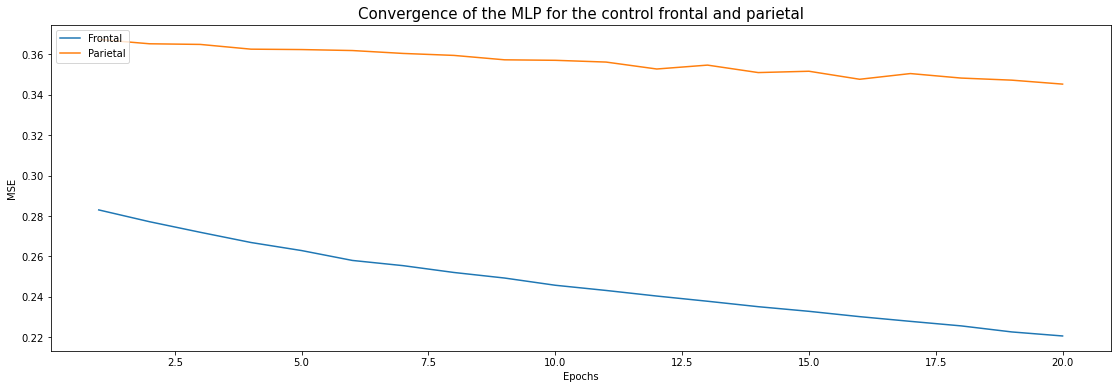

In [31]:
#subplots MSE frontal e parietal
# fig5 = plt.figure(figsize=(19,12))
# x1 = np.arange(1, len(fit_gf.history['loss']) + 1)
# plt.subplot(2,1,1)
# plt.plot(x1, fit_gf.history['loss'])
# plt.plot(fit_gf.history['val_loss'])
# plt.title('Convergence of the MLP for the gifted frontal',fontsize=15)
# plt.xlabel('Epochs')
# plt.ylabel('MSE')
# plt.legend(['Train', 'Validation'], loc='upper left')
# plt.subplot(2,1,2)
# x2 = np.arange(1, len(fit_gp.history['loss']) + 1)
# plt.plot(x2, fit_gp.history['loss'])
# plt.plot(fit_gp.history['val_loss'])
# plt.title('Convergence of the MLP for the gifted parietal',fontsize=15)
# plt.xlabel('Epochs')
# plt.ylabel('MSE')
# plt.legend(['Train', 'Validation'], loc='upper left')

fig5 = plt.figure(figsize=(19,6))
x1 = np.arange(1, len(fit_gf.history['loss']) + 1)
plt.plot(x1, fit_gf.history['loss'])
plt.plot(x1, fit_gp.history['loss'])
plt.title('Convergence of the MLP for the control frontal and parietal',fontsize=15)
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend(['Frontal', 'Parietal'], loc='upper left')

plt.savefig(f'outputs_fig/fig5_convergence_mlp_regressor_gifted_frontal_parietal.png')
# plt.savefig('/content/drive/MyDrive/Colab Notebooks/PPGCC/EEG/outputs_fig_visual/fig5_convergence_mlp_regressor_gifted_frontal_parietal.png')

##### <a id='p_mlp_g_pred'>2.2.2.3 Predizendo dados de teste</a>

In [32]:
pred_gifted_f = best_model_gf.predict(G_x_test_f)
pred_gifted_p = best_model_gp.predict(G_x_test_p)

rmse, mae, mape = [], [], []

rmse.append(np.sqrt(mean_squared_error(G_y_test_f, pred_gifted_f)))
mae.append(mean_absolute_error(G_y_test_f, pred_gifted_f))
mape.append(mean_absolute_percentage_error(G_y_test_f, pred_gifted_f))

rmse.append(np.sqrt(mean_squared_error(G_y_test_p, pred_gifted_p)))
mae.append(mean_absolute_error(G_y_test_p, pred_gifted_p))
mape.append(mean_absolute_percentage_error(G_y_test_p, pred_gifted_p))

print(f'\nMédia das métricas de validação no grupo Superdotado (frontal e parietal)\n')
print(f'RMSE: {np.mean(rmse):.5f}\n')
print(f'MAE:  {np.mean(mae):.5f}\n')
print(f'MAPE: {np.mean(mape):.2f}%')

47/47 [==============================] - 0s 2ms/step

Média das métricas de validação no grupo Superdotado (frontal e parietal)

RMSE: 0.89636

MAE:  0.67926

MAPE: 5.20%


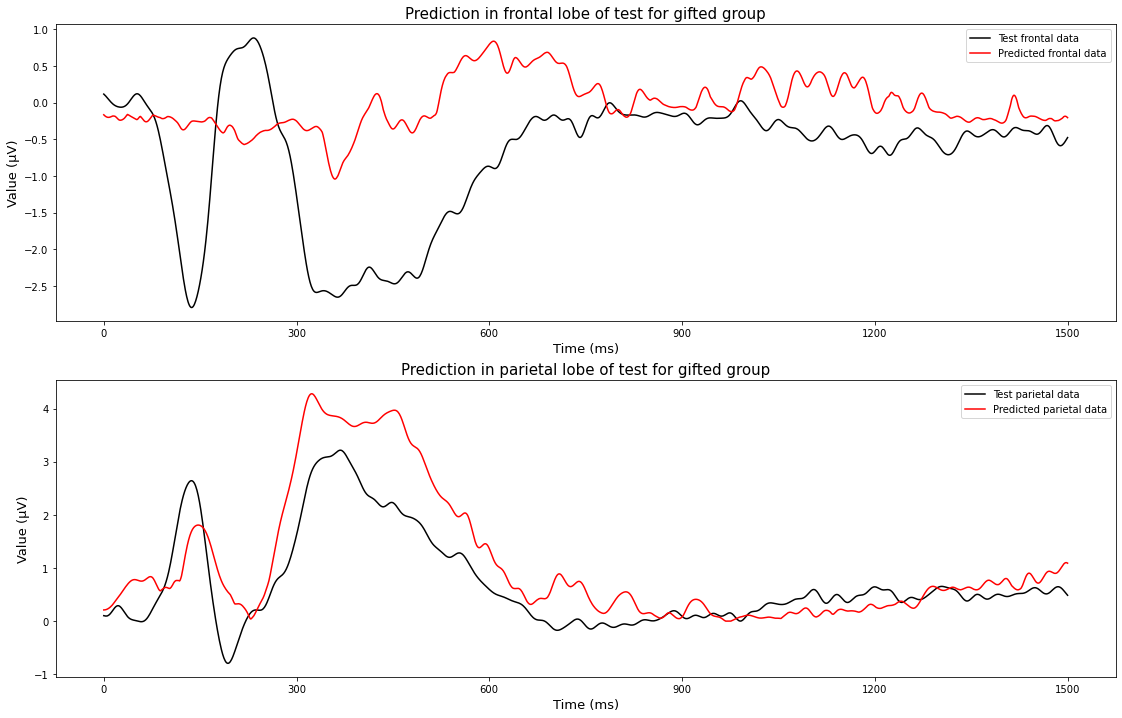

In [33]:
fig6 = plt.figure(figsize=(19,12))
plt.subplot(2,1,1)
plt.plot(G_y_test_f, 'k', label='Test frontal data')
plt.plot(pred_gifted_f, 'r', label='Predicted frontal data')
plt.xticks(np.arange(0, len(G_y_test_f), step=300))
plt.legend()
plt.title("Prediction in frontal lobe of test for gifted group",fontsize=15)
plt.xlabel("Time (ms)",fontsize=13)
plt.ylabel("Value (µV)",fontsize=13)
plt.subplot(2,1,2)
plt.plot(G_y_test_p, 'k', label='Test parietal data')
plt.plot(pred_gifted_p, 'r', label='Predicted parietal data')
plt.xticks(np.arange(0, len(G_y_test_p), step=300))
plt.legend()
plt.title("Prediction in parietal lobe of test for gifted group",fontsize=15)
plt.xlabel("Time (ms)",fontsize=13)
plt.ylabel("Value (µV)",fontsize=13)

plt.savefig(f'outputs_fig/fig6_prediction_test_gifted_frontal_parietal.png')
# plt.savefig('/content/drive/MyDrive/Colab Notebooks/PPGCC/EEG/outputs_fig_visual/fig6_prediction_test_gifted_frontal_parietal.png')

#### <a id='p_mlp_class'>2.2.3. Classificação a partir das predições anteriores (MLP - DFF)</a>

In [34]:
df_s_classify = EEG_evoked[(EEG_evoked['group'] == 'gifted') & (EEG_evoked['subject_id'].isin(s_classify))].copy()

df_s_classify = df_s_classify[(df_s_classify['time'] >= 0) & (df_s_classify['time'] <= 1500)]

mean_sensor = df_s_classify[df_s_classify.columns[3:]].mean(axis=1).reset_index(drop=True)

df_s_classify_f = df_s_classify[['subject_id', 'group', 'time']+sensor_frontal].copy()
df_s_classify_f['mean']= df_s_classify['mean']
df_s_classify_p = df_s_classify[['subject_id', 'group', 'time']+sensor_parietal].copy()
df_s_classify_p['mean']= df_s_classify['mean']

x_test_f, y_test_f = split_sequence(data=df_s_classify_f[df_s_classify_f.columns[3:]].values, n_steps=steps)
x_test_p, y_test_p = split_sequence(data=df_s_classify_p[df_s_classify_p.columns[3:]].values, n_steps=steps)
y_test_cf = C_mean_sensors_f
y_test_cp = C_mean_sensors_p
y_test_gf = G_mean_sensors_f
y_test_gp = G_mean_sensors_p

In [35]:
pred_cf = best_model_cf.predict(x_test_f)
pred_cp = best_model_cp.predict(x_test_p)

metrics = []
rmse, mae, mape = [], [], []
rmse.append(np.sqrt(mean_squared_error(y_test_cf, pred_cf)))
mae.append(mean_absolute_error(y_test_cf, pred_cf))
mape.append(mean_absolute_percentage_error(y_test_cf, pred_cf))
rmse.append(np.sqrt(mean_squared_error(y_test_cp, pred_cp)))
mae.append(mean_absolute_error(y_test_cp, pred_cp))
mape.append(mean_absolute_percentage_error(y_test_cp, pred_cp))
metrics.append([np.mean(rmse), np.mean(mae), np.mean(mape)])

pred_gf = best_model_gf.predict(x_test_f)
pred_gp = best_model_gp.predict(x_test_p)

rmse, mae, mape = [], [], []
rmse.append(np.sqrt(mean_squared_error(y_test_gf, pred_gf)))
mae.append(mean_absolute_error(y_test_gf, pred_gf))
mape.append(mean_absolute_percentage_error(y_test_gf, pred_gf))
rmse.append(np.sqrt(mean_squared_error(y_test_gp, pred_gp)))
mae.append(mean_absolute_error(y_test_gp, pred_gp))
mape.append(mean_absolute_percentage_error(y_test_gp, pred_gp))
metrics.append([np.mean(rmse), np.mean(mae), np.mean(mape)])

metrics

47/47 [==============================] - 0s 2ms/step


[[1.0456205171999007, 0.758512593553431, 13.072471897463341],
 [0.8390338288800085, 0.6025806373499583, 8.33050421397007]]

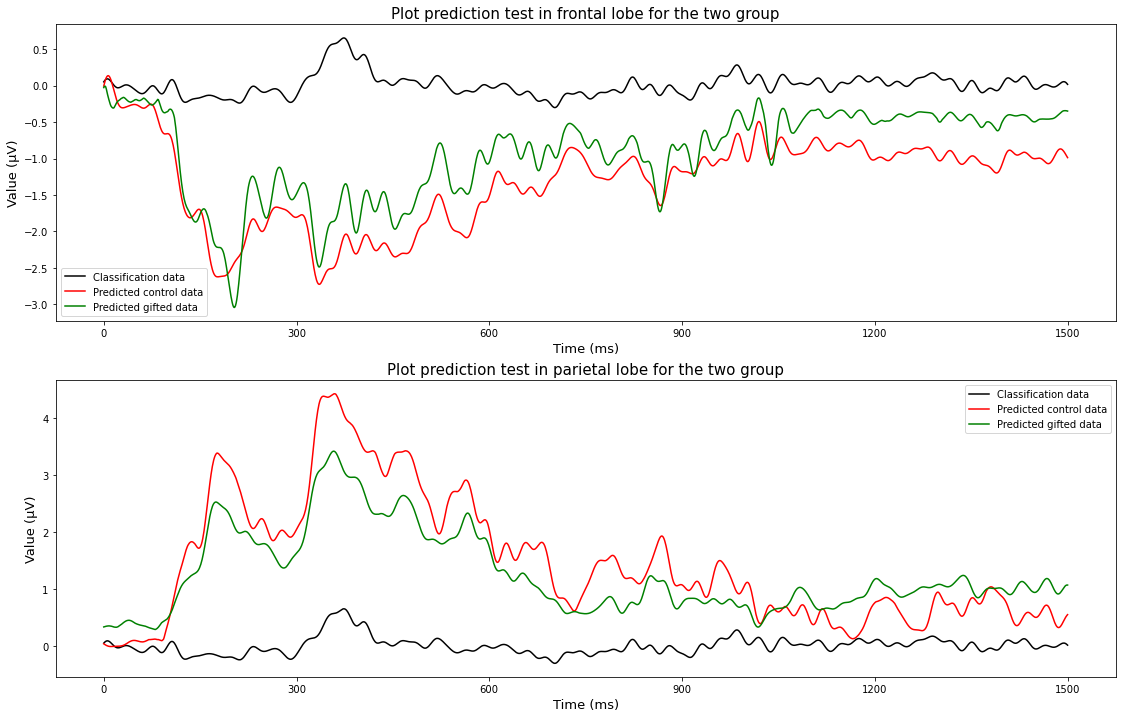

In [37]:
#subplots MSE frontal e parietal
fig7 = plt.figure(figsize=(19,12))
plt.subplot(2,1,1)
plt.plot(y_test_f, 'k', label='Classification data')
plt.plot(pred_cf, 'r', label='Predicted control data')
plt.plot(pred_gf, 'g', label='Predicted gifted data')
plt.xticks(np.arange(0, len(y_test_f), step=300))
plt.legend()
plt.title("Plot prediction test in frontal lobe for the two group",fontsize=15)
plt.xlabel("Time (ms)",fontsize=13)
plt.ylabel("Value (µV)",fontsize=13)

plt.subplot(2,1,2)
plt.plot(y_test_p, 'k', label='Classification data')
plt.plot(pred_cp, 'r', label='Predicted control data')
plt.plot(pred_gp, 'g', label='Predicted gifted data')
plt.xticks(np.arange(0, len(y_test_f), step=300))
plt.legend()
plt.title("Plot prediction test in parietal lobe for the two group",fontsize=15)
plt.xlabel("Time (ms)",fontsize=13)
plt.ylabel("Value (µV)",fontsize=13)

plt.savefig(f'outputs_fig/fig7_prediction_test_two_group_frontal_parietal.png')
# plt.savefig('/content/drive/MyDrive/Colab Notebooks/PPGCC/EEG/outputs_fig_visual/fig7_prediction_test_two_group_frontal_parietal.png')

### <a id='ensemble'>2.3. Ensemble Learning Methods</a>

In [ ]:
#Combinando melhores modelos
# from sklearn.ensemble import VotingRegressor

# vo_reg = VotingRegressor(estimators=[('mlp_cf', best_model_cf), ('mlp_cp', best_model_cp)])
# vo_reg.fit(C_x_train_f, C_y_train_f)
# pred_control_f = vo_reg.predict(C_x_test_f)
# rmse = np.sqrt(mean_squared_error(C_y_test_f, pred_control_f))
# print(f'Voting Regressor Loss for frontal lobe: {rmse:4f} \n')

# models = [mlp_cf, mlp_cp]

# for model in models: 
#     model.fit(C_x_train_f, C_y_train_f)
#     pred = model.predict(C_x_train_f)
#     rmse = np.sqrt(mean_squared_error(C_y_test_f, pred))
#     class_name = model.__class__.__name__

#     print(f'{class_name} Regressor Loss for frontal lobe {rmse} \n')